# Preparing Data for Machine Learning

# Demo

# Insurance Data Challenge

### Loading Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# enable inline plots in the notebook
%matplotlib inline

### Loading Data

In [2]:
insur_df1=pd.read_csv('/Insurance_Data_Challenge.csv')
insur_df=insur_df1
insur_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Datatypes of all columns
print(insur_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Data Preparation

#### Understanding data structure

In [4]:
# All columns
columns=insur_df.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# structure of dataset
print(insur_df.shape)


(1338, 7)


In [6]:
# Summary of dataset
insur_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Missing Value Treatment

In [7]:
# Checking for null value in each column
print(insur_df.isnull().sum())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


We find that there is no missing value exist in this dataset, so we skip the missing value treatment.

### Feature Engineering

In [8]:
# Converting numeric labeled column into categorical column
insur_df['sex']=insur_df['sex'].astype('category')
insur_df['smoker']=insur_df['smoker'].astype('category')
insur_df['region']=insur_df['region'].astype('category')


#income_df.head()
print(insur_df.dtypes)



age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [9]:
# Using Label Encoder technique to convert categorical column into numerical type

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
insur_df['sex_encode']= label_encoder.fit_transform(insur_df['sex'])
insur_df['sex_encode'].unique()

insur_df['smoker_encode']= label_encoder.fit_transform(insur_df['smoker'])
insur_df['smoker_encode'].unique()

insur_df['region_encode']= label_encoder.fit_transform(insur_df['region'])
insur_df['region_encode'].unique()



print(insur_df.head())

   age     sex     bmi  children smoker     region      charges  sex_encode  \
0   19  female  27.900         0    yes  southwest  16884.92400           0   
1   18    male  33.770         1     no  southeast   1725.55230           1   
2   28    male  33.000         3     no  southeast   4449.46200           1   
3   33    male  22.705         0     no  northwest  21984.47061           1   
4   32    male  28.880         0     no  northwest   3866.85520           1   

   smoker_encode  region_encode  
0              1              3  
1              0              2  
2              0              2  
3              0              1  
4              0              1  


In [10]:
insur_df.dtypes


age                 int64
sex              category
bmi               float64
children            int64
smoker           category
region           category
charges           float64
sex_encode          int32
smoker_encode       int32
region_encode       int32
dtype: object

### Feature Scaling

In [11]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_insur_df = insur_df.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_insur_df.to_numpy()),columns=new_insur_df.columns)
 return df_scaled

In [12]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
insur_df_scaled=feature_scale(scale)
insur_df_scaled

,age,bmi,children,charges,sex_encode,smoker_encode,region_encode
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,1.000000
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.666667
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.666667
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,0.333333
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,0.333333
5,0.282609,0.263115,0.0,0.042056,0.0,0.0,0.666667
6,0.608696,0.470272,0.2,0.113629,0.0,0.0,0.666667
7,0.413043,0.316922,0.6,0.098320,0.0,0.0,0.333333
8,0.413043,0.373150,0.4,0.084352,1.0,0.0,0.000000
9,0.913043,0.265806,0.0,0.443765,0.0,0.0,0.333333


### Feature Selection

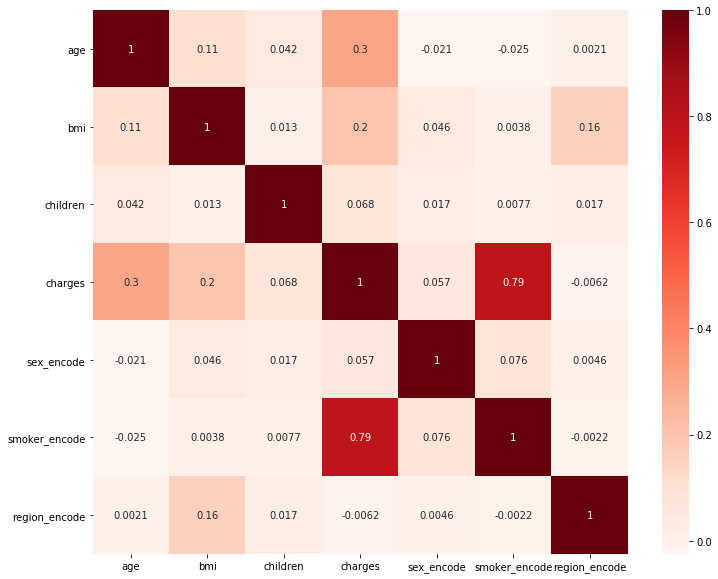

In [13]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
plt.figure(figsize=(12,10))
cor=insur_df_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



In [14]:

#Correlation with output variable
cor_target = abs(cor["charges"])
cor_target #corr value with output variable is <0.5

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features



age              0.299008
charges          1.000000
smoker_encode    0.787251
Name: charges, dtype: float64

### Splitting Data

In [15]:
# splitting dataframe by row index
insur_df=insur_df1
R=len(insur_df.index)
train_num=int(R*0.7)
insur_df_train = insur_df.iloc[:train_num,:]
insur_df_test = insur_df.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(insur_df_train.shape, insur_df_test.shape))


Shape of new dataframes - (936, 10) , (401, 10)


In [16]:
# splitting dataframe using train_test_split() built in method

X, y = insur_df_scaled.iloc[:,:-1], insur_df_scaled.iloc[:,-1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


(1338, 6) (1338,)


### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


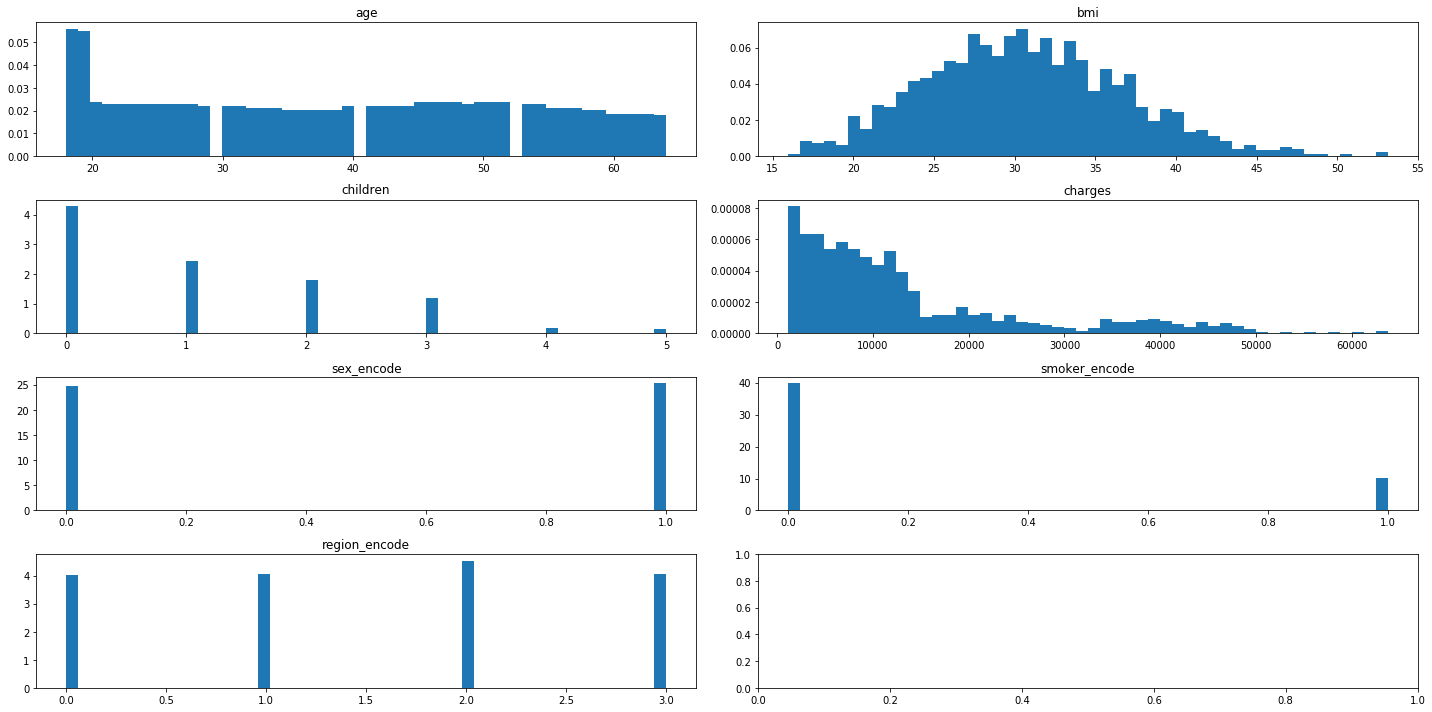

In [17]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_insur_df = insur_df.select_dtypes(include=numerics)
numeric_cols=new_insur_df.columns
num_cols=2
n_bins = 50
# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(new_insur_df[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


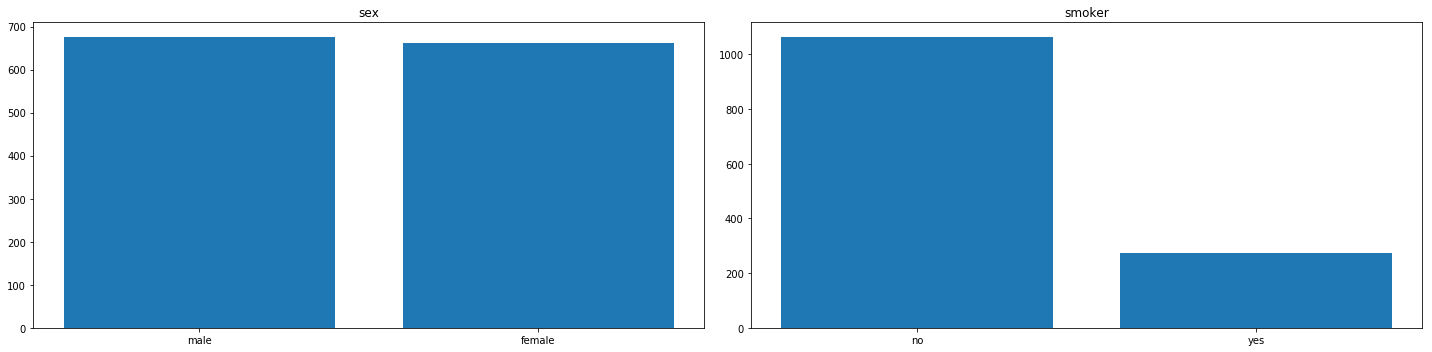

In [18]:
# Histogram of all categorical features
num_cols = 2
cat_insur_df = insur_df.select_dtypes('category')
categorical_cols=cat_insur_df.columns
# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))
# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
 stats = cat_insur_df[col].value_counts()
 values = list(stats)
 names = list(map(lambda x : ''.join((str(x))),list(stats.index)))
 ax.bar(names,values)
 ax.set_title(col)
 
plt.show()

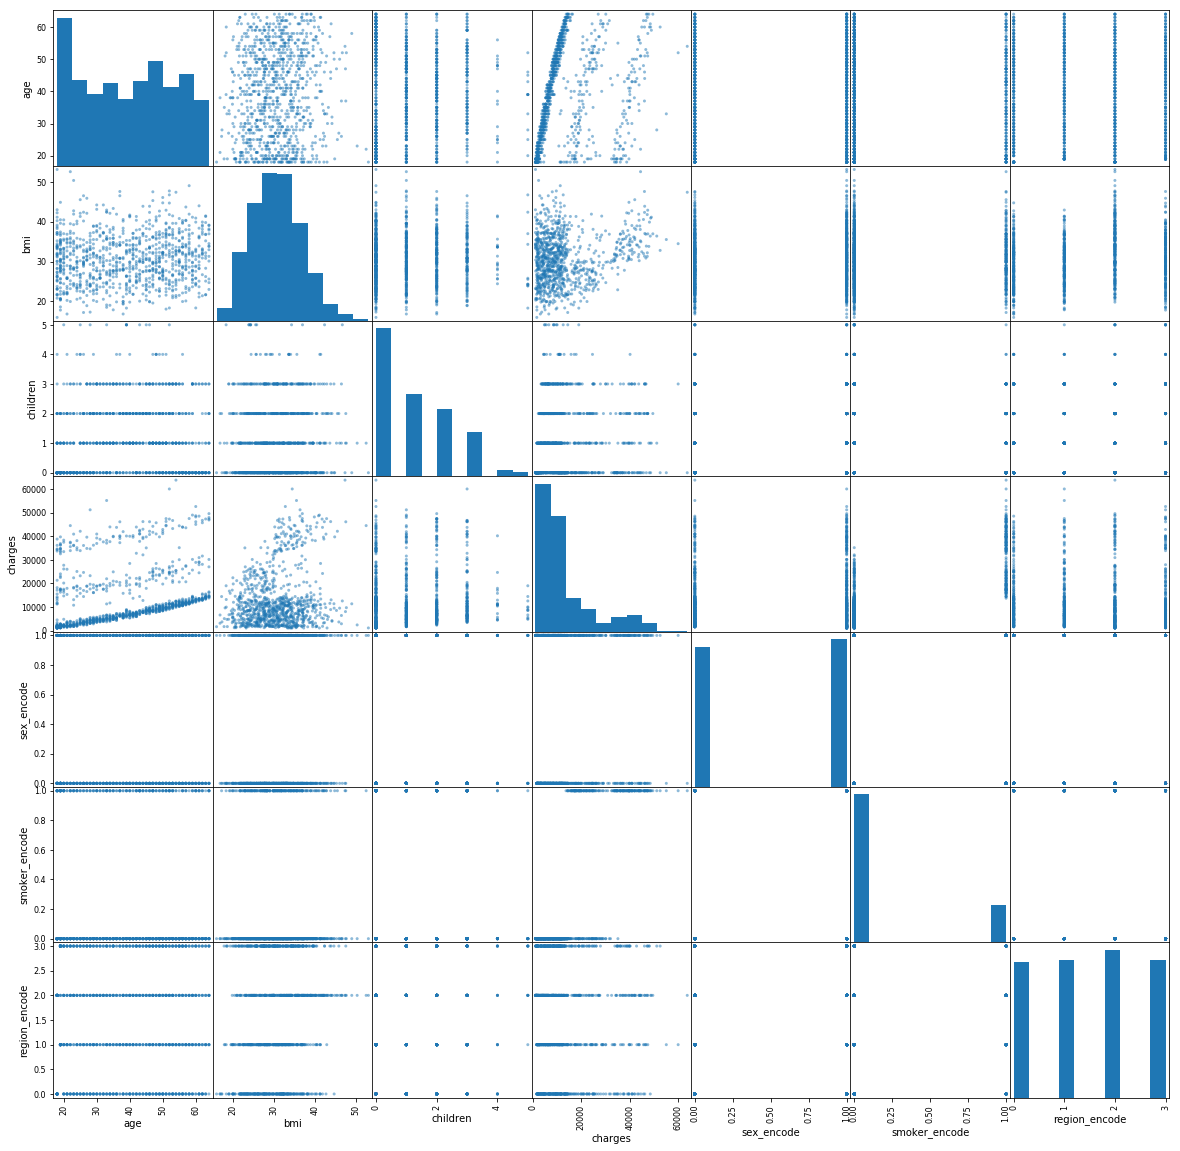

In [19]:
# Scatter Matrix plot of all columns
pd.plotting.scatter_matrix(insur_df[numeric_cols].sample(1000),figsize=(20,20))
plt.show()


[yes, no]
Categories (2, object): [yes, no]


Text(0, 0.5, 'Smokers')

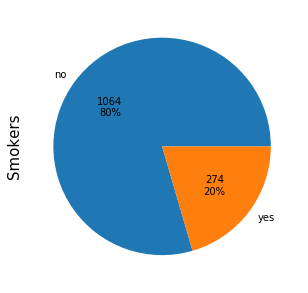

In [23]:
# Pie charts of categorical features
labels=insur_df['smoker'].unique()
print(labels)
def label_function(val):
 return f'{val / 100 * len(insur_df):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#plt.pie(loan_df_c['purpose_encode'])
insur_df.groupby(insur_df['smoker']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Smokers', size=15)
# show plot

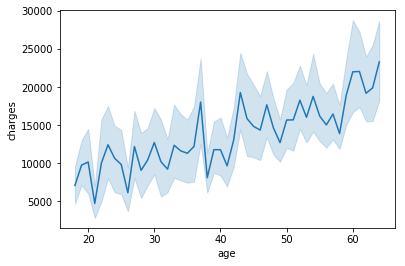

In [24]:
import seaborn as sns
sns.lineplot(x="age", y="charges", data=insur_df)
plt.show()

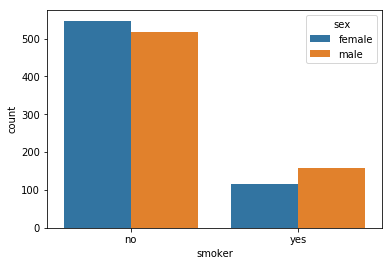

In [33]:
sns.countplot(x="smoker", hue="sex", data=insur_df)
#This bar chart helps to understand the smoking habits gender wise
